/var/folders/q8/bb32ljys4g700gwvl88jxncw0000gn/T/ipykernel_6005/2340195964.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock_data = yf.download(ticker, start=start_date)
[*********************100%***********************]  1 of 1 completed
/var/folders/q8/bb32ljys4g700gwvl88jxncw0000gn/T/ipykernel_6005/2340195964.py:11: FutureWarning: YF.download() has changed argument auto_adjust default to True
  market_data = yf.download(market_ticker, start=start_date)
[*********************100%***********************]  1 of 1 completed

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     2374.
Date:                Sun, 08 Feb 2026   Prob (F-statistic):          1.67e-313
Time:                        21:09:11   Log-Likelihood:                 4540.1
No. Observations:                1532   AIC:                            -9076.
Df Residuals:                    1530   BIC:                            -9066.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.217      0.2

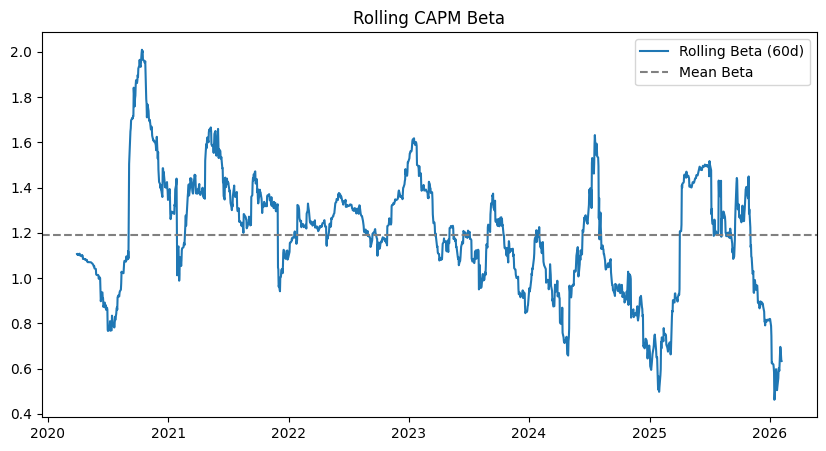

In [ ]:
# Empirical Analysis of CAPM

# Author: Jertvaag

# DESCRIPTION:
# This notebook performs an empirical analysis of the Capital Asset Pricing Model (CAPM) 
# using historical stock and market data from Yahoo Finance to estimate the beta of a stock 
# and analyze its relationship with market returns.

import yfinance as yf
import numpy as np
import pandas as pd
import statsmodels.api as sm

ticker = "AAPL"
market_ticker = "^GSPC"
start_date = "2020-01-01" 

stock_data = yf.download(ticker, start=start_date)
market_data = yf.download(market_ticker, start=start_date)

price_col_stock = "Adj Close" if "Adj Close" in stock_data.columns else "Close"
price_col_market = "Adj Close" if "Adj Close" in market_data.columns else "Close"

stock_returns = stock_data[price_col_stock].pct_change()
market_returns = market_data[price_col_market].pct_change()

df = pd.concat(
    [stock_returns, market_returns],
    axis=1,
keys=["stock", "market"]
).dropna()

y = df["stock"].values              
X = df["market"].values             
X = sm.add_constant(X)               

model = sm.OLS(y, X).fit()

print(model.summary())

window = 60

def rolling_beta(stock, market, window):
    cov = stock.rolling(window).cov(market)
    var = market.rolling(window).var()
    return cov / var

stock_returns = df["stock"].iloc[:, 0]
market_returns = df["market"].iloc[:, 0]


df["beta_rolling"] = rolling_beta(
    stock_returns,
    market_returns,
    window=60
)

import matplotlib.pyplot as plt 

plt.figure(figsize=(10, 5))
plt.plot(df.index, df["beta_rolling"], label="Rolling Beta (60d)")
plt.axhline(df["beta_rolling"].mean(), linestyle="--", color="gray", label="Mean Beta")
plt.title("Rolling CAPM Beta")
plt.legend()
plt.show()



